In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
# import plotly.plotly as py
# import plotly.offline as pyoff
import plotly.graph_objs as go

import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Settings
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# with open('../data/interim/df.pkl', 'rb') as read_file:
#     df = pickle.load(read_file)
with open('../data/processed/master_df.pkl', 'rb') as read_file:
    master_df = pickle.load(read_file)   

In [4]:
master_df_1 = master_df.copy()
# df_1 = df.copy()
master_df_1.head(1)

,age,age_group,"age_group_[10, 30)","age_group_[30, 40)","age_group_[40, 50)","age_group_[50, 60)","age_group_[60, 96)",balance,balance_category,"balance_category_[-8019, 0)","balance_category_[0, 500)","balance_category_[3000, 102128)","balance_category_[500, 3000)",campaign,cluster_predicted,contact,contact_label_encoded,contact_label_encoded_0,contact_label_encoded_1,contact_label_encoded_2,current_engagement_category,"current_engagement_category_[1, 6)","current_engagement_category_[10, 64)","current_engagement_category_[6, 10)",day,default,default_label_encoded,default_label_encoded_0,default_label_encoded_1,duration,duration_category,"duration_category_[0, 60)","duration_category_[180, 300)","duration_category_[300, 4919)","duration_category_[60, 180)",education,education_label_encoded,education_label_encoded_0,education_label_encoded_1,education_label_encoded_2,education_label_encoded_3,housing,housing_label_encoded,housing_label_encoded_0,housing_label_encoded_1,ID,is_second_half_of_month,is_second_half_of_month_0,is_second_half_of_month_1,job,job_label_encoded,job_label_encoded_0,job_label_encoded_1,job_label_encoded_10,job_label_encoded_11,job_label_encoded_2,job_label_encoded_3,job_label_encoded_4,job_label_encoded_5,job_label_encoded_6,job_label_encoded_7,job_label_encoded_8,job_label_encoded_9,level_0,loan,loan_label_encoded,loan_label_encoded_0,loan_label_encoded_1,marital,marital_label_encoded,marital_label_encoded_0,marital_label_encoded_1,marital_label_encoded_2,month,month_label_encoded,month_label_encoded_1,month_label_encoded_10,month_label_encoded_11,month_label_encoded_12,month_label_encoded_2,month_label_encoded_3,month_label_encoded_4,month_label_encoded_5,month_label_encoded_6,month_label_encoded_7,month_label_encoded_8,month_label_encoded_9,new_customers,new_customers_0,new_customers_1,pdays,pdays_category,"pdays_category_[-1, 0)","pdays_category_[0, 180)","pdays_category_[180, 872)",poutcome,poutcome_label_encoded,poutcome_label_encoded_0,poutcome_label_encoded_1,poutcome_label_encoded_2,poutcome_label_encoded_3,prev_engagement_category,"prev_engagement_category_[0, 1)","prev_engagement_category_[1, 6)","prev_engagement_category_[10, 276)","prev_engagement_category_[6, 10)",previous,total_duration,total_duration_category,"total_duration_category_[0, 180)","total_duration_category_[180, 600)","total_duration_category_[600, 60171)",y,y_label_encoded
0,39,"[30, 40)",0,1,0,0,0,816,"[500, 3000)",0,0,0,1,3,2,cellular,0,1,0,0,"[1, 6)",1,0,0,27,no,0,1,0,37,"[0, 60)",1,0,0,0,tertiary,2,0,0,1,0,yes,1,0,1,23354,1,0,1,management,4,0,0,0,0,0,0,1,0,0,0,0,0,0.00,no,0,1,0,single,2,0,0,1,aug,8,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,-1,"[-1, 0)",1,0,0,unknown,3,0,0,0,1,"[0, 1)",1,0,0,0,0,111,"[0, 180)",1,0,0,no,0


Check if there is variation across bins for each categorical variables

In [5]:
master_df_1['age_group'].value_counts()/len(master_df_1)
age_grp_by_target = master_df_1.groupby('age_group')['y_label_encoded'].mean()
age_grp_by_target

[30, 40)   0.40
[40, 50)   0.26
[50, 60)   0.19
[10, 30)   0.12
[60, 96)   0.04
Name: age_group, dtype: float64

age_group
[10, 30)   0.18
[30, 40)   0.11
[40, 50)   0.09
[50, 60)   0.09
[60, 96)   0.34
Name: y_label_encoded, dtype: float64

In [6]:
master_df_1['balance_category'].value_counts()/len(master_df_1)
balance_category_by_target = master_df_1.groupby('balance_category')['y_label_encoded'].mean()
balance_category_by_target

[0, 500)         0.44
[500, 3000)      0.35
[3000, 102128)   0.12
[-8019, 0)       0.08
Name: balance_category, dtype: float64

balance_category
[-8019, 0)       0.06
[0, 500)         0.10
[500, 3000)      0.14
[3000, 102128)   0.16
Name: y_label_encoded, dtype: float64

In [4]:
duration_bins = [0,60,120,300,600,900,4919]
#1 - <1 min
#2 - 1-2 min
#3 - 2-5 min
#4 - 5-10 min
#5 - 10-15 min
#6 - >15 min

master_df_1['duration_bins'] = pd.cut(master_df_1['duration'], duration_bins, include_lowest = True, right = False)
master_df_1['duration_bins'].value_counts()/len(master_df_1)
master_df_1.groupby('duration_bins')['y_label_encoded'].mean()


[120, 300)    0.42
[60, 120)     0.20
[300, 600)    0.19
[0, 60)       0.10
[600, 900)    0.05
[900, 4919)   0.03
Name: duration_bins, dtype: float64

duration_bins
[0, 60)       0.00
[60, 120)     0.02
[120, 300)    0.09
[300, 600)    0.19
[600, 900)    0.42
[900, 4919)   0.59
Name: y_label_encoded, dtype: float64

In [5]:
current_engagement_bins = [1,2,6,11,64]
master_df_1['current_engagement_bins'] = pd.cut(master_df_1['campaign'], current_engagement_bins, include_lowest = True, right = False)
master_df_1['current_engagement_bins'].value_counts()/len(master_df_1)
current_engagement_deciles_by_target = master_df_1.groupby('current_engagement_bins')['y_label_encoded'].mean()
current_engagement_deciles_by_target

[2, 6)     0.52
[1, 2)     0.39
[6, 11)    0.07
[11, 64)   0.03
Name: current_engagement_bins, dtype: float64

current_engagement_bins
[1, 2)     0.15
[2, 6)     0.11
[6, 11)    0.07
[11, 64)   0.04
Name: y_label_encoded, dtype: float64

In [4]:
master_df_1['campaign'].value_counts()

1     17544
2     12505
3     5521 
4     3522 
5     1764 
6     1291 
7     735  
8     540  
9     327  
10    266  
11    201  
12    155  
13    133  
14    93   
15    84   
16    79   
17    69   
18    51   
19    44   
20    43   
21    35   
22    23   
23    22   
25    22   
24    20   
28    16   
29    16   
26    13   
31    12   
27    10   
32    9    
30    8    
33    6    
34    5    
36    4    
35    4    
43    3    
38    3    
41    2    
50    2    
37    2    
51    1    
55    1    
46    1    
58    1    
44    1    
39    1    
63    1    
Name: campaign, dtype: int64

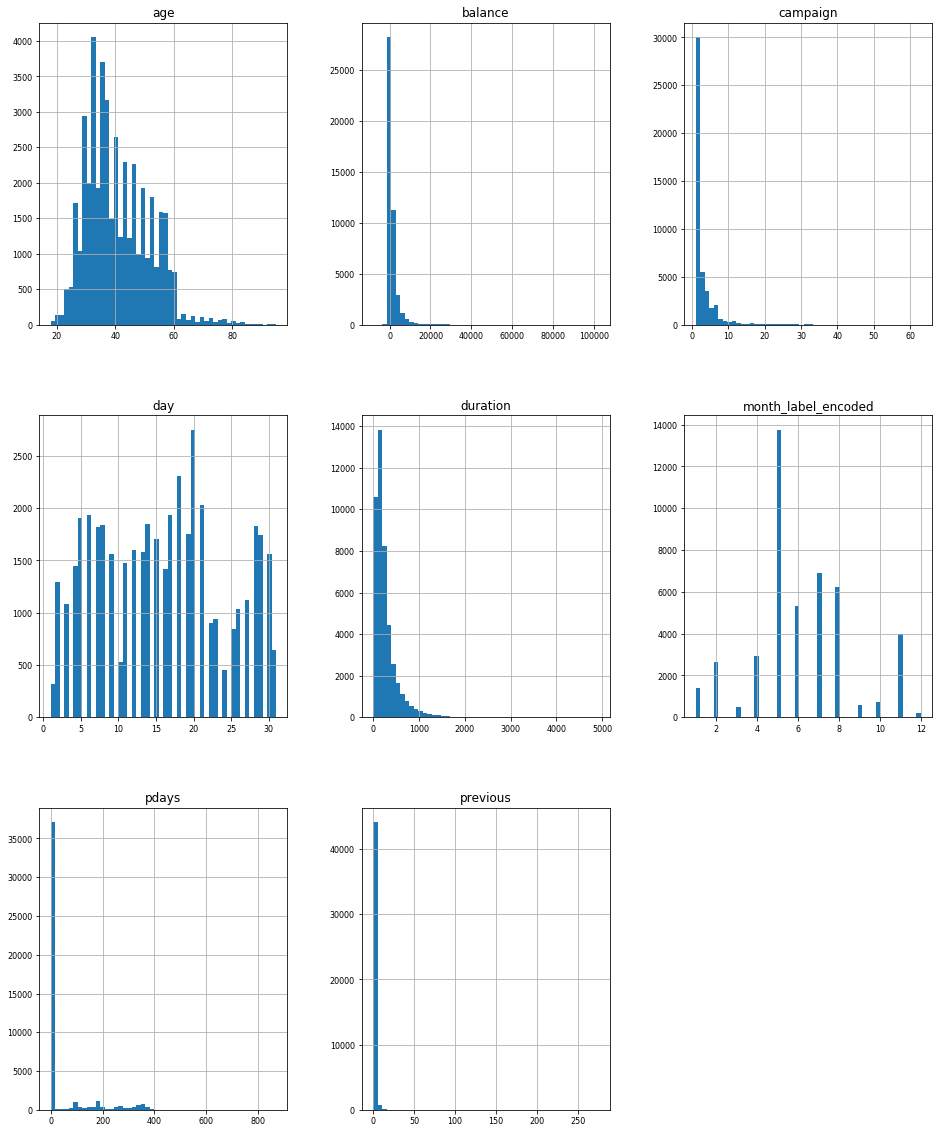

In [13]:
num_features = master_df_1[['age', 'balance', 'campaign', 'duration', 'pdays','previous', 'day', 'month_label_encoded' ]]
num_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [9]:
master_df_1['pdays_category'].value_counts()/len(master_df_1)
master_df_1.groupby('pdays_category')['y_label_encoded'].mean()

[-1, 0)      0.82
[180, 872)   0.11
[0, 180)     0.07
Name: pdays_category, dtype: float64

pdays_category
[-1, 0)      0.09
[0, 180)     0.29
[180, 872)   0.19
Name: y_label_encoded, dtype: float64

In [6]:
master_df_1.rename(columns={'pdays_category' : 'pdays_half_yearly_bins'}, inplace=True)


In [49]:
# pdays_bins = [-1,0,90,180,270,365,872]
# df_1['pdays_quarterly_bins'] = pd.cut(df_1['pdays'], pdays_bins, include_lowest = True, right = False)
# df_1['pdays_quarterly_bins'].value_counts()/len(df_1)
# df_1.groupby('pdays_quarterly_bins')['y_label_encoded'].mean()

[-1, 0)      0.82
[90, 180)    0.06
[270, 365)   0.05
[180, 270)   0.05
[365, 872)   0.02
[0, 90)      0.01
Name: pdays_bins, dtype: float64

pdays_bins
[-1, 0)      0.09
[0, 90)      0.33
[90, 180)    0.28
[180, 270)   0.27
[270, 365)   0.10
[365, 872)   0.28
Name: y_label_encoded, dtype: float64

In [11]:
master_df_1['prev_engagement_category'].value_counts()/len(master_df_1)
master_df_1.groupby('prev_engagement_category')['y_label_encoded'].mean()

[0, 1)      0.82
[1, 6)      0.16
[6, 10)     0.02
[10, 276)   0.01
Name: prev_engagement_category, dtype: float64

prev_engagement_category
[0, 1)      0.09
[1, 6)      0.23
[6, 10)     0.28
[10, 276)   0.22
Name: y_label_encoded, dtype: float64

In [13]:
master_df_1.columns.tolist()

['age',
 'age_group',
 'age_group_[10, 30)',
 'age_group_[30, 40)',
 'age_group_[40, 50)',
 'age_group_[50, 60)',
 'age_group_[60, 96)',
 'balance',
 'balance_category',
 'balance_category_[-8019, 0)',
 'balance_category_[0, 500)',
 'balance_category_[3000, 102128)',
 'balance_category_[500, 3000)',
 'campaign',
 'cluster_predicted',
 'contact',
 'contact_label_encoded',
 'contact_label_encoded_0',
 'contact_label_encoded_1',
 'contact_label_encoded_2',
 'current_engagement_category',
 'current_engagement_category_[1, 6)',
 'current_engagement_category_[10, 64)',
 'current_engagement_category_[6, 10)',
 'day',
 'default',
 'default_label_encoded',
 'default_label_encoded_0',
 'default_label_encoded_1',
 'duration',
 'duration_category',
 'duration_category_[0, 60)',
 'duration_category_[180, 300)',
 'duration_category_[300, 4919)',
 'duration_category_[60, 180)',
 'education',
 'education_label_encoded',
 'education_label_encoded_0',
 'education_label_encoded_1',
 'education_label_enco

In [7]:
model_2_variables = ['ID','cluster_predicted', 'age_group', 'balance_category', 'contact_label_encoded',
                     'current_engagement_bins', 'default_label_encoded', 'duration_bins',
                     'education_label_encoded', 'housing_label_encoded', 'job_label_encoded', 
                    'marital_label_encoded',   'loan_label_encoded', 'month_label_encoded',
                   'poutcome_label_encoded', 'pdays_half_yearly_bins', 'prev_engagement_category', 'is_second_half_of_month', 
                'day', 'new_customers', 'y_label_encoded']
df_for_model_2 = master_df_1[model_2_variables]
len(model_2_variables)


21

In [8]:
len(df_for_model_2)
df_for_model_2.head(1)

45211

,ID,cluster_predicted,age_group,balance_category,contact_label_encoded,current_engagement_bins,default_label_encoded,duration_bins,education_label_encoded,housing_label_encoded,job_label_encoded,marital_label_encoded,loan_label_encoded,month_label_encoded,poutcome_label_encoded,pdays_half_yearly_bins,prev_engagement_category,is_second_half_of_month,day,new_customers,y_label_encoded
0,23354,2,"[30, 40)","[500, 3000)",0,"[2, 6)",0,"[0, 60)",2,1,4,2,0,8,3,"[-1, 0)","[0, 1)",1,27,1,0


In [9]:
df_for_model_2.duplicated().sum()

0

In [10]:
with open('../data/processed/df_for_moadel_3.pkl', 'wb') as to_write: 
    pickle.dump(df_for_model_3, to_write)
    